In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("digikala-orders.csv")
data.head(10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


# A. Orders count per month (Plot)

In [60]:
data["DateTime_CartFinalize"] = pd.to_datetime(data["DateTime_CartFinalize"])
data["DateTime_CartFinalize"] = data["DateTime_CartFinalize"].map(lambda date : date.year *100 + date.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,201510,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,201802,980000.0,خرمدره,1.0
2,4228130,3184893,50144,201606,229358.0,قرچک,1.0
3,22225624,6888562,70208,201809,16514.0,قم,1.0
4,4068771,2533490,67627,201605,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,201804,344037.0,تهران,2.0
199996,4425393,3745774,131645,201607,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,201703,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,201702,193486.0,همدان,1.0


In [67]:
df = data.groupby("DateTime_CartFinalize")["ID_Order"].count().reset_index()
df

,DateTime_CartFinalize,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


Text(0.5, 0, 'monthes during 2013 to 2018')

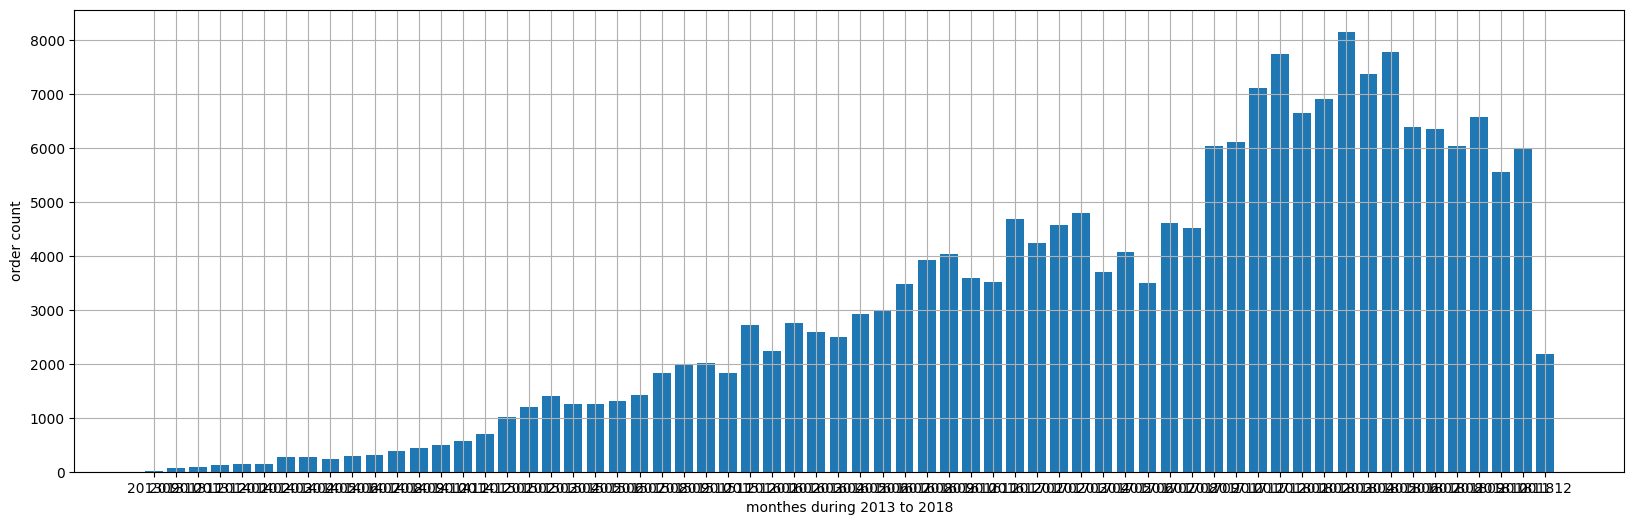

In [77]:
plt.figure(figsize=(20,6))
plt.bar(df['DateTime_CartFinalize'].to_numpy(str) , df['ID_Order'].to_numpy() )
plt.grid()
plt.ylabel("order count")
plt.xlabel("monthes during 2013 to 2018")

Text(0.5, 0, 'monthes during 2013 to 2018')

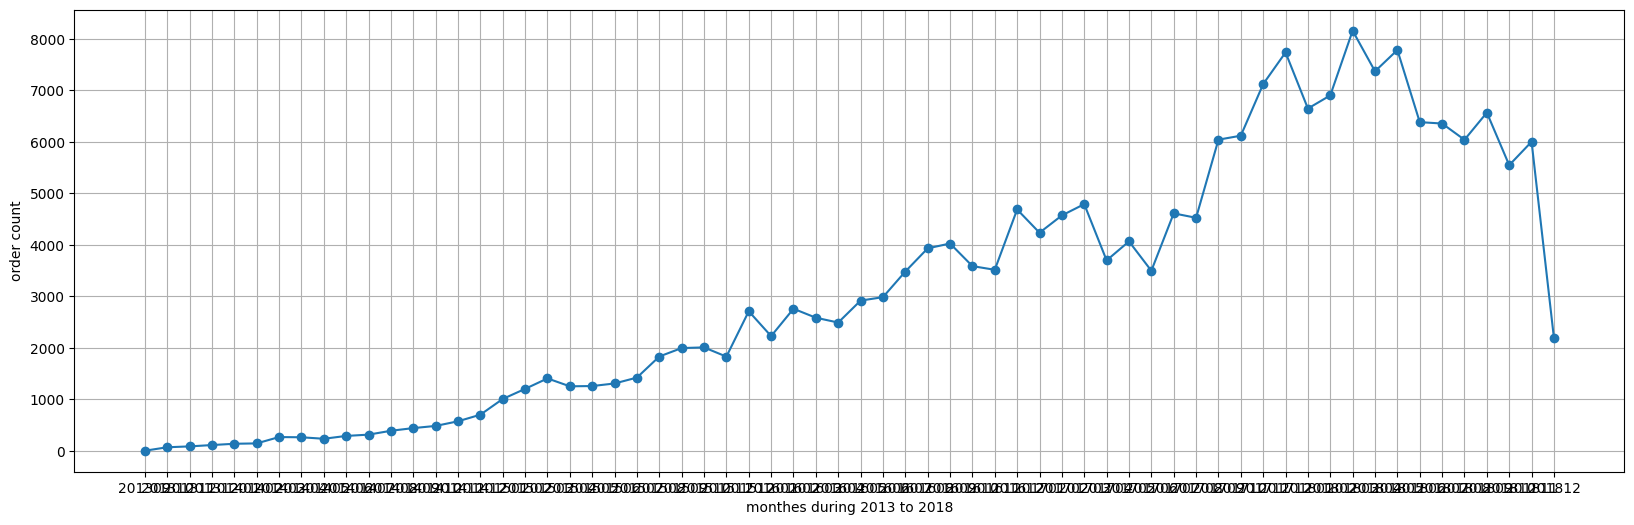

In [78]:
plt.figure(figsize=(20,6))
plt.plot(df['DateTime_CartFinalize'].to_numpy(str) , df['ID_Order'].to_numpy() , marker= "o" )
plt.grid()
plt.ylabel("order count")
plt.xlabel("monthes during 2013 to 2018")


# B. Customers count per city (Pie Plot).

In [55]:
df = data.groupby("city_name_fa")["ID_Customer"].nunique().reset_index()
df

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


f:\pyprogram\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


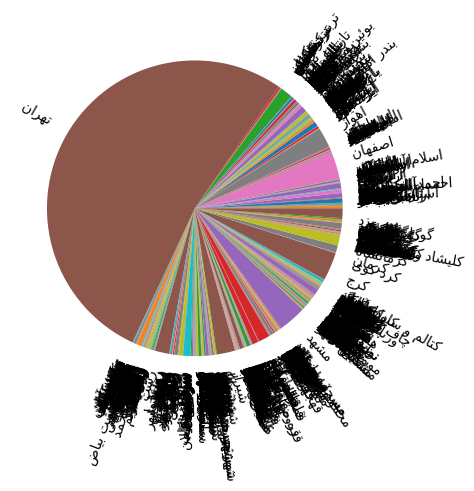

In [56]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

reverse_names =[]
for name in df['city_name_fa'].to_numpy(str) :
    reverse_names.append(get_display(reshape(name)))

plt.pie(df["ID_Customer"] , labels= reverse_names  , radius=1 , rotatelabels=True)
plt.show()

In [57]:
df_main_cities = data.groupby("city_name_fa")["ID_Customer"].nunique().reset_index()
df_main_cities = df_main_cities.query("ID_Customer > 800 ")
df_main_cities

,city_name_fa,ID_Customer
54,ارومیه,846
76,اصفهان,4664
97,اهواز,3353
110,بابل,814
164,بندر عباس,973
202,تبریز,2075
215,تهران,81048
355,رشت,2414
399,ساری,1236
505,شیراز,3076


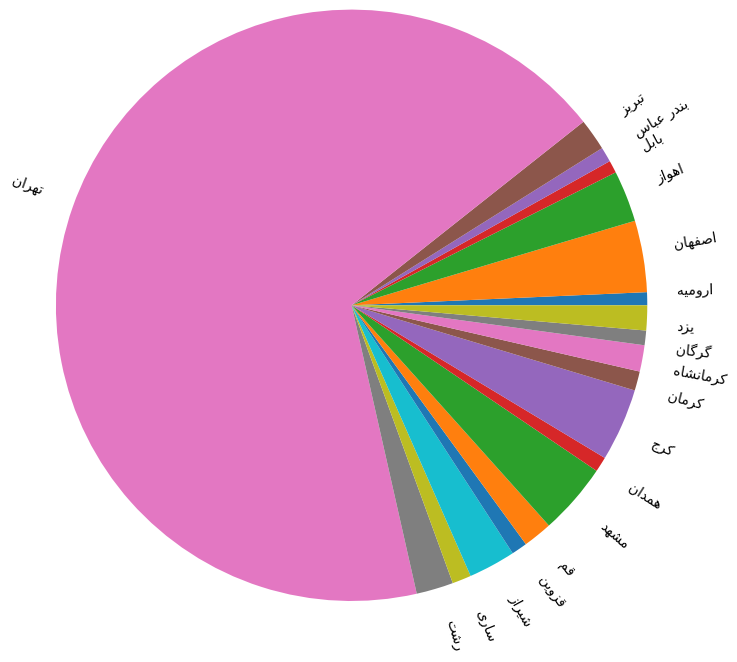

In [58]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

reverse_names =[]
for name in df_main_cities['city_name_fa'].to_numpy(str) :
    reverse_names.append(get_display(reshape(name)))

plt.pie(df_main_cities["ID_Customer"] , labels= reverse_names  , radius=2 , rotatelabels=True)
plt.show()